In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("placement (1).csv")
df.head()
# so in this data set there are 1000 rows 

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

Text(0.5, 1.0, 'placement_exam_marks kde')

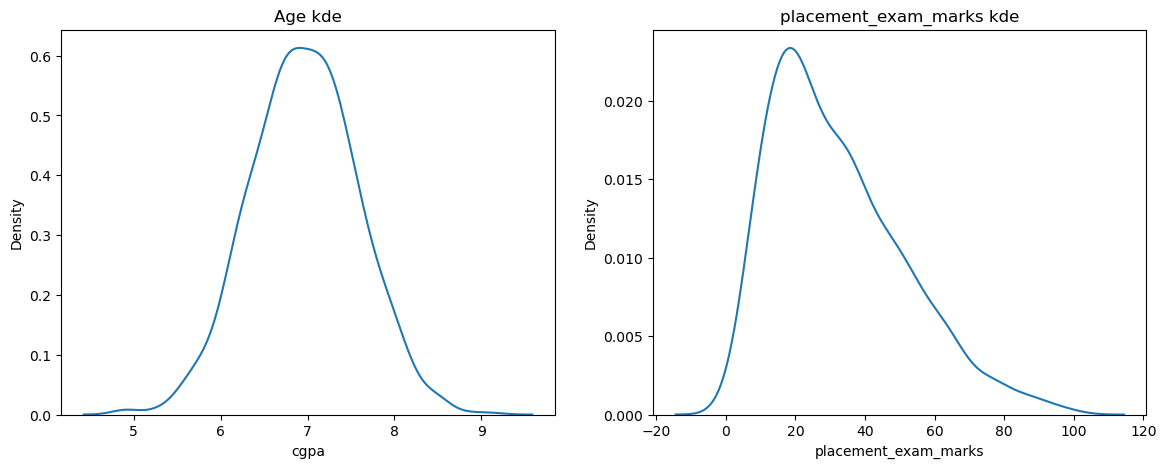

In [12]:
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.kdeplot(df["cgpa"])
plt.title("Age kde")

plt.subplot(122)
sns.kdeplot(df["placement_exam_marks"])
plt.title("placement_exam_marks kde")

- so if we see we can apply zscore on age column because it is distributed normally 
- outlier detection using zscore required a normally distributed data

In [14]:
print("mean", df["cgpa"].mean())
print("standard deviation", df["cgpa"].std())
print("min", df["cgpa"].min())
print("max", df["cgpa"].max())

mean 6.96124
standard deviation 0.6158978751323894
min 4.89
max 9.12


In [24]:
# now we will detect outliers
print("lowest",(df["cgpa"].mean() - 3*df["cgpa"].std()))
print("highest",(df["cgpa"].mean() + 3*df["cgpa"].std()))

lowest 5.113546374602832
highest 8.808933625397168


In [32]:
df[(df["cgpa"] < 5.11) | (df["cgpa"] > 8.80)]
# so basically this are the outliers in our data

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


- now we have to remove this outliers

- there are two techniques to remove outliers
- 1) trimming
- 2) capping

# 1) Trimming

- trimming means remove that rows where outliers are present

In [36]:
new_df=df[(df["cgpa"] > 5.11) & (df["cgpa"] < 8.80)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [39]:
# Approach 2 Z score

In [43]:
df["cgpa_zscore"]=(df["cgpa"] - df["cgpa"].mean())/df["cgpa"].std()
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [46]:
df[(df["cgpa_zscore"] < -3) | (df["cgpa_zscore"] > 3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [49]:
#triming
new_df=df[(df["cgpa_zscore"] > -3) & (df["cgpa_zscore"] < 3)]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


# 2) Capping

In [51]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [64]:
lower_limit=(df["cgpa"].mean()- 3*df["cgpa"].std())
upper_limit=(df["cgpa"].mean() + 3*df["cgpa"].std())
upper_limit,lower_limit

(np.float64(8.808933625397168), np.float64(5.113546374602832))

In [60]:
df["cgnp.where(
    df["cgpa"]>upper_limit,
    upper_limit,
    np.where(
        df["cgpa"] < lower_limit,
        lower_limit,
        df["cgpa"]
    )
)

array([7.19      , 7.46      , 7.54      , 6.42      , 7.23      ,
       7.3       , 6.69      , 7.12      , 6.45      , 7.75      ,
       6.82      , 6.38      , 6.58      , 5.68      , 7.91      ,
       7.1       , 6.53      , 7.56      , 6.93      , 7.63      ,
       6.69      , 7.43      , 6.76      , 6.05      , 6.44      ,
       6.28      , 7.45      , 6.53      , 7.23      , 6.51      ,
       7.46      , 7.66      , 5.91      , 6.23      , 8.15      ,
       7.48      , 6.85      , 8.51      , 6.58      , 7.25      ,
       6.6       , 6.7       , 7.46      , 7.85      , 7.88      ,
       6.92      , 7.3       , 6.92      , 6.29      , 8.23      ,
       6.2       , 6.24      , 7.53      , 6.69      , 8.42      ,
       8.12      , 6.93      , 7.73      , 7.34      , 7.7       ,
       7.94      , 7.51      , 7.61      , 6.22      , 6.98      ,
       6.27      , 6.67      , 8.04      , 6.58      , 7.41      ,
       6.98      , 6.13      , 7.9       , 6.39      , 6.16   

In [63]:
df.describe()

,cgpa,placement_exam_marks,placed,cgpa_zscore
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.961240,32.225000,0.489000,-1.474376e-16
std,0.615898,19.130822,0.500129,1.000000e+00
min,4.890000,0.000000,0.000000,-3.362960e+00
25%,6.550000,17.000000,0.000000,-6.677081e-01
50%,6.960000,28.000000,0.000000,-2.013321e-03
75%,7.370000,44.000000,1.000000,6.636815e-01
max,9.120000,100.000000,1.000000,3.505062e+00
